# Assignment-3 Machine Learning Lab

**RollNo: 101803186, Name: Kulpreet Singh, Group: 3COE9**

#**Question 1**

Load the load_digit dataset from sklearn.datasets.

This dataset is made up of 1797 8x8 images. Each image, is of a hand-written digit. Therefore, each training
example has 64 features (8X8) pixel values. Hence, the size of dataset is 1797X64.

Implement SVD in the following two ways:

(a) Step-by-step

(b) Using inbuilt SVD function in python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as la
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
import numpy as np

In [2]:
digits_df = load_digits()
digits_df

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [7]:
X = digits_df.data
y = digits_df.target

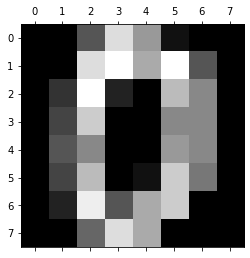

In [8]:
image = X[0]
image = image.reshape((8,8))
plt.matshow(image, cmap = 'gray')

In [9]:
def userDefined_SVD(data_matrix):
    A = data_matrix
    A = A.reshape((8,8))         #Doing specifically for the image dataset..can also be done in the loop and then sent as matrix to function
    m = A.shape[0]
    n = A.shape[1]
    AT = A.T
    AAT = A.dot(AT)
    ATA = AT.dot(A)


    Sigma = np.diag(np.sqrt(la.eig(AAT)[0]))
    for i in range(A.shape[1] - n + 1):
        Sigma = np.concatenate((Sigma,np.zeros((m,1))),axis = 1)


    eigenValues = la.eig(AAT)[0].real
    print(eigenValues)
    eigenValues = [round(i,2) for i in eigenValues]



    eigen = la.eig(ATA)
    eigenValuesForV = [round(i,2) for i in eigen[0].real]

    V = []
    for values in eigenValues:
        col = eigen[1][:,eigenValuesForV.index(values)]
        if all(i < 0 for i in col):
            col = -col
        V.append(col.T)
    for i in range(A.shape[1] - n + 1):
        col = eigen[1][:,eigenValuesForV.index(0.0)]
        V.append(col)
    V = np.array(V)
    print(V)
    V = V.T

    U = []
    for values in eigenValues:
        col = V[:,eigenValues.index(values)]
        U.append((1/np.sqrt(values)) * A.dot(col))
    U = np.array(U)

    U = U.real
    V = V.real
    Sigma = Sigma.real
#     print("\t\t\t\tU: ")
#     print(U)
#     print("\t\t\t\tSigma: ")
#     print(Sigma)
#     print("\t\t\t\tV: ")
#     print(V)
    return U, Sigma, V

In [10]:
#Showing SVD application on a single image
U, Sigma, V = userDefined_SVD(X[0])
newA = U.dot(Sigma)
newA = newA.dot(V.T)
newA = np.around(newA, decimals = 2)
newA

[ 2.33364789e+03  6.22794581e+02  6.43324829e+01  3.63533389e+01
  1.24925441e+01  3.79164416e-01 -9.01059113e-14 -7.51025314e-15]
[[ 0.          0.12163488  0.63584592  0.35165517  0.29714822  0.54789077
   0.26222547  0.        ]
 [ 0.         -0.19933667 -0.18261557  0.67860378  0.51224488 -0.29241939
  -0.34425199  0.        ]
 [ 0.         -0.14172169  0.06200574 -0.46630482  0.34898491  0.40001459
  -0.69052728  0.        ]
 [ 0.         -0.28987701 -0.59880272  0.25418992 -0.21336759  0.65991771
   0.10852187  0.        ]
 [ 0.         -0.70735326  0.44313298  0.13810032 -0.48546381 -0.08537679
  -0.20309735  0.        ]
 [ 0.         -0.58395848 -0.05979355 -0.33869034  0.49630315 -0.10730494
   0.53185986  0.        ]
 [ 1.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 1.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 1.          0.          0.          0.          0.          0.
   0.      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in multiply


array([[  0.  ,  -3.09,   4.02,  12.06,  10.5 ,   4.42,  -3.78,   0.  ],
       [  0.  ,   3.35,  14.33,  13.56,  10.49,   8.78,   5.53,   0.  ],
       [  0.  ,  -0.19,  -7.93,  -4.83,  -3.92,  -8.77,  -2.23,   0.  ],
       [  0.  ,  -3.92,  -6.76,   9.72,   6.71, -11.55,  -7.32,   0.  ],
       [  0.  ,  -0.73,  -5.65,  -1.43,   3.45,  -2.27,  -6.32,   0.  ],
       [  0.  ,  -4.55, -20.7 ,  -2.86,  -6.35, -15.58,  -6.48,   0.  ],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan]])

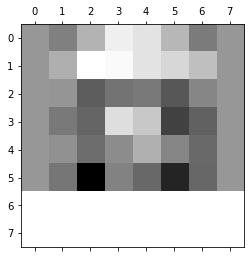

In [11]:
plt.matshow(newA, cmap = 'gray')

In [12]:
U, s, V = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
S = S[:, :n_component]
VT = V[:n_component, :]
A = U.dot(S.dot(VT))
print(A)

[[ 0.         -1.10250487  4.74435972 12.15568926  9.52358964  2.43670787
  -1.33162352  0.        ]
 [ 0.          1.80812405 15.31314009 13.78577759 11.23175886 12.27377328
   4.48103998  0.        ]
 [ 0.          3.86314194 13.3616312   1.19132785  1.49304889 12.58720014
   7.64864807  0.        ]
 [ 0.          3.38663959 10.75775564 -0.35121797  0.19764019 10.36126569
   6.61014847  0.        ]
 [ 0.          3.11113019  9.52267918 -0.84818288 -0.23689734  9.26479383
   6.03660007  0.        ]
 [ 0.          3.6061433  11.79300077  0.11953681  0.60341469 11.27094239
   7.07220207  0.        ]
 [ 0.          2.07851157 12.62819854  8.58310741  7.12723816 10.60433104
   4.65628518  0.        ]
 [ 0.         -1.17965998  4.87563035 12.71323745  9.95666369  2.46580335
  -1.44478111  0.        ]]


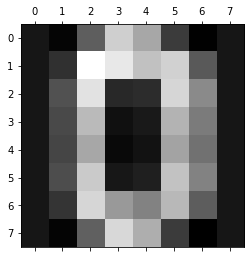

In [13]:
plt.matshow(A, cmap = 'gray')

#**Question 2**

Download the IMDB dataset of movie reviews from the following link

https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark
datasets.

(a) Load the dataset in a dataframe.

(b) Drop the sentiment column and consider the first 1000 reviews.

(c) Make the corpus of first 1000 reviews.

(d) Convert the corpus into binary BOW vector of size mXn, where m=1000 (number of reviews
documents) and n is the number of unique terms obtained from the 1000 documents. Each ij th entry
of the vector is a binary value which is 1 if the jth term is present in ith review else 0.

(e) Compute the co-occurrence matrix of order nXn where each ij th entry of matrix is number of
documents in which both i and j th terms co-occur. (Use binary co-occurrence vector to compute
it).

(f) Using Truncated SVD method of python find the reduced matrix of co-occurrence matrix with
number of coomponents as 100.

(g) The reduced matrix of order nX100 are word embeddings of n words of dimensionality 100.
Explore more about word embeddings to learn more about it

In [15]:
path = "/content/drive/MyDrive/Machine Learning Lab/IMDB Dataset.csv"
df = pd.read_csv(path)
df.drop(columns = ['sentiment'],inplace = True)
df

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


In [16]:
corpus = []
i = 0
for review in df['review']:
    if(i >= 1000):
        break
    review_str = str(review)
    list_i = [word for word in review_str.split(" ") if word.isalnum()]
    review_i = " ".join(list_i)
    corpus.append(review_i)
    i += 1
corpus

['One of the other reviewers has mentioned that after watching just 1 Oz episode be They are as this is exactly what happened with first thing that struck me about Oz was its brutality and unflinching scenes of which set in right from the word Trust this is not a show for the faint hearted or This show pulls no punches with regards to sex or Its is in the classic use of the is called OZ as that is the nickname given to the Oswald Maximum Security State It focuses mainly on Emerald an experimental section of the prison where all the cells have glass fronts and face so privacy is not high on the Em City is home to Irish and death dodgy dealings and shady agreements are never far would say the main appeal of the show is due to the fact that it goes where other shows Forget pretty pictures painted for mainstream forget forget mess The first episode I ever saw struck me as so nasty it was I say I was ready for but as I watched I developed a taste for and got accustomed to the high levels of

In [17]:
def unique(corpus):
    unique_list = []
    for review in corpus:
        for word in review.split(' '):
            if word not in unique_list:
                unique_list.append(word)
    return unique_list
unique_words = unique(corpus)
len(unique_words)

16843

In [18]:
BoW_df = pd.DataFrame(columns = unique_words)
BoW_df

,One,of,the,other,reviewers,has,mentioned,that,after,watching,just,1,Oz,episode,be,They,are,as,this,is,exactly,what,happened,with,first,thing,struck,me,about,was,its,brutality,and,unflinching,scenes,which,set,in,right,from,...,inanity,masquerades,inanely,fastfowarded,shennanigans,sophomoric,Tinting,redundant,HOTD,acid,spat,costs,intensional,jam,zoology,modified,Handgun,Komodo,enhancement,substitute,boating,Members,units,metre,aiming,cameraman,microphones,Reporters,faintest,Background,Handguns,52,Expensive,hesitation,offices,intuition,stubborn,hunted,masking,planes


In [19]:
review_number = 0
all_reviews = []
for review in corpus:
    temp = []
    for word in unique_words:
        if word in review:
            temp.append(1)
        else:
            temp.append(0)
    review_number += 1
    all_reviews.append(temp)
new_df = pd.DataFrame(all_reviews, columns = BoW_df.columns)
new_df

,One,of,the,other,reviewers,has,mentioned,that,after,watching,just,1,Oz,episode,be,They,are,as,this,is,exactly,what,happened,with,first,thing,struck,me,about,was,its,brutality,and,unflinching,scenes,which,set,in,right,from,...,inanity,masquerades,inanely,fastfowarded,shennanigans,sophomoric,Tinting,redundant,HOTD,acid,spat,costs,intensional,jam,zoology,modified,Handgun,Komodo,enhancement,substitute,boating,Members,units,metre,aiming,cameraman,microphones,Reporters,faintest,Background,Handguns,52,Expensive,hesitation,offices,intuition,stubborn,hunted,masking,planes
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,1,1,1,1,0,0,0,1,1,0,1,0,0,0,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,1,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
new_df = new_df.T
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
One,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
of,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1
the,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
other,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0
reviewers,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
intuition,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
stubborn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
hunted,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
masking,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
import numpy as np
df_asint = new_df.astype(int)
co_occ_mat = df_asint.T.dot(df_asint)
np.fill_diagonal(co_occ_mat.values,0)
co_occ_mat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,91,82,76,92,70,69,83,72,26,67,77,113,66,53,80,76,95,75,74,86,91,52,100,76,78,133,80,77,132,115,98,73,132,109,96,70,108,71,96,...,90,76,82,73,84,66,79,116,34,80,119,110,108,83,85,104,115,93,84,102,64,82,75,65,122,115,94,66,75,102,69,120,64,84,102,86,54,108,98,131
1,91,0,75,70,79,67,61,72,67,23,60,65,99,54,46,63,55,68,56,65,84,67,43,82,75,68,104,72,58,121,93,91,57,112,89,79,57,91,59,88,...,69,69,69,64,59,57,62,106,31,75,98,84,79,76,78,85,92,81,72,91,56,71,70,57,106,89,78,54,67,80,59,108,55,71,86,72,46,82,80,111
2,82,75,0,61,75,68,62,78,59,28,61,69,94,62,42,69,63,83,55,66,85,70,59,78,65,68,109,67,63,121,95,85,57,118,86,97,60,90,61,89,...,65,65,67,67,61,67,67,102,32,76,83,82,87,63,70,86,93,69,78,88,61,68,63,53,100,92,92,52,71,90,58,96,58,67,96,72,48,85,79,104
3,76,70,61,0,69,60,54,64,53,24,54,60,87,53,39,65,58,70,61,61,68,58,44,75,63,54,85,61,61,88,80,80,51,94,69,77,53,76,53,69,...,61,56,58,57,48,49,52,80,29,64,81,79,78,58,62,72,76,65,70,74,57,58,59,51,88,69,69,49,59,70,56,83,48,57,67,74,45,76,72,89
4,92,79,75,69,0,67,62,77,63,21,62,68,112,59,50,72,65,85,69,68,91,71,48,92,77,74,122,71,60,124,96,95,67,117,86,89,57,87,64,86,...,78,67,75,68,61,55,78,109,32,80,99,94,97,72,77,91,99,91,74,93,66,70,69,61,104,99,84,54,78,84,71,101,54,71,79,81,53,88,78,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,86,72,72,74,81,70,60,77,70,26,63,75,105,61,41,78,65,78,62,67,86,68,53,89,72,66,106,71,63,117,104,88,63,109,83,87,66,86,61,86,...,73,73,78,64,65,61,61,105,35,71,94,102,89,71,77,80,94,83,80,87,69,69,71,53,103,94,86,56,69,82,60,106,59,68,85,0,51,89,77,114
996,54,46,48,45,53,49,40,51,45,20,45,52,61,46,34,45,47,53,47,50,53,51,34,57,46,49,65,48,48,70,60,55,49,62,57,55,40,59,47,58,...,47,46,51,48,45,37,45,63,24,48,72,56,56,44,56,57,61,58,51,54,48,53,48,42,60,50,50,41,56,58,49,61,44,47,58,51,0,61,63,71
997,108,82,85,76,88,75,72,87,72,28,67,86,110,64,48,81,75,93,74,80,91,97,58,104,78,73,138,86,65,139,118,116,71,141,102,101,73,114,68,109,...,85,83,83,79,74,71,77,111,39,80,120,114,106,83,100,95,118,104,83,99,78,86,74,62,119,101,87,64,80,106,69,116,64,92,93,89,61,0,100,136
998,98,80,79,72,78,81,69,78,65,28,73,75,108,68,52,70,68,93,66,77,92,78,56,91,79,77,119,75,67,117,107,96,76,121,95,112,63,106,67,95,...,82,76,78,68,69,64,71,105,33,74,117,96,100,71,80,98,108,89,81,101,72,83,80,65,98,94,80,63,72,94,61,123,66,79,93,77,63,100,0,129


In [22]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components = 100)
svd.fit(co_occ_mat)
embedding = svd.transform(co_occ_mat)
embedding

array([[ 2.86736209e+03,  1.56271603e+01, -1.10451464e+01, ...,
         4.93392240e+00,  7.70143465e+00,  2.82380609e+00],
       [ 2.43505485e+03, -1.05301459e+01,  3.76252123e+01, ...,
         7.30633869e+00,  1.07684685e+00, -1.13875174e+01],
       [ 2.43768150e+03, -4.13724118e+01,  6.84547172e+00, ...,
        -4.03522539e+00,  6.41130259e+00, -8.87988799e+00],
       ...,
       [ 2.91381485e+03,  1.55428015e+01, -1.65168994e+01, ...,
        -7.28236055e+00, -1.40383367e+00, -7.00989194e+00],
       [ 2.70322699e+03, -4.67844627e+01, -3.70369394e+01, ...,
         2.00287622e+00, -3.85769855e+00,  1.83901777e+00],
       [ 3.68940779e+03,  2.09541949e+02, -3.83132585e+01, ...,
        -1.67977248e+00,  1.26600661e+01,  9.23616129e+00]])

Word Embeddings are the texts converted into numbers. There may be different numerical representations of the same text.

#**Question 3**

Implement LDA (step-by-step) on IRIS dataset.

In [23]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
# df = pd.DataFrame(iris)
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [24]:
independentVariables = pd.DataFrame(iris.data, columns = iris.feature_names)
dependentVariables = pd.Categorical.from_codes(iris.target, iris.target_names)

In [25]:
independentVariables.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
independentVariables.shape

(150, 4)

In [27]:
independentVariables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
irisDataFrame = independentVariables.join(pd.Series(dependentVariables, name = 'class'))
irisDataFrame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
between_class_feature_means = pd.DataFrame(columns = iris.target_names)
for c, rows in irisDataFrame.groupby('class'):
    between_class_feature_means[c] = rows.mean()
between_class_feature_means

,setosa,versicolor,virginica
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026


In [31]:
within_class_scatter_matrix = np.zeros((4,4))
for c, rows in irisDataFrame.groupby('class'):
    rows = rows.drop(['class'], axis = 1)
    s = np.zeros((4,4))
for index, row in rows.iterrows():
    x, mc = row.values.reshape(4,1), between_class_feature_means[c].values.reshape(4,1)
    s += (x-mc).dot((x - mc).T)
within_class_scatter_matrix += s
feature_means = irisDataFrame.mean()
between_class_scatter_matrix = np.zeros((4,4))
for c in between_class_feature_means:
    n = len(irisDataFrame.loc[irisDataFrame['class'] == c].index)
    mc, m = between_class_feature_means[c].values.reshape(4,1), feature_means.values.reshape(4,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)
between_class_scatter_matrix

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

In [32]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range (len(eigen_values))]
pairs = sorted(pairs, key = lambda x: x[0], reverse = True)
for pair in pairs:
    print(pair)

(91.99883376833466, array([-0.3573401 , -0.44692768,  0.6207997 ,  0.53588379]))
(0.7207812881904497, array([-0.06385329,  0.91053097, -0.02615814,  0.40764184]))
(2.5524998364769397e-14, array([-0.81284794,  0.13412246,  0.08542658,  0.56034962]))
(1.3194090427241032e-14, array([-0.7143516 ,  0.43377014,  0.45697719, -0.30449485]))


In [33]:
eigen_values_sum = sum(eigen_values)
print('Explained Variance: ')
for i, pair in enumerate(pairs):
    print('EigenVector: {}: {}'.format(i, (pair[0]/eigen_values_sum).real))

Explained Variance: 
EigenVector: 0: 0.9922262264813007
EigenVector: 1: 0.007773773518699755
EigenVector: 2: 2.7529232459829e-16
EigenVector: 3: 1.4230096209089586e-16


In [34]:
matrix_W = np.hstack((pairs[0][1].reshape(4,1), pairs[1][1].reshape(4,1))).real
X_lda = np.array(independentVariables.dot(matrix_W))
X_lda

array([[-2.41038507,  2.90611358],
       [-2.11545321,  2.46361876],
       [-2.19545069,  2.66111142],
       [-1.99086398,  2.57121203],
       [-2.41934383,  3.00355201],
       [-2.40294151,  3.32485091],
       [-2.13343387,  2.88775132],
       [-2.26787832,  2.81883   ],
       [-1.89209039,  2.40449231],
       [-2.15165439,  2.51129186],
       [-2.54489267,  3.06644798],
       [-2.13433033,  2.82898485],
       [-2.13330758,  2.4292399 ],
       [-2.14087744,  2.46901399],
       [-3.00814692,  3.3219134 ],
       [-2.85776732,  3.76619204],
       [-2.65126138,  3.33531417],
       [-2.35679669,  2.94687777],
       [-2.51903915,  3.17387764],
       [-2.42879502,  3.21742124],
       [-2.28665442,  2.78805706],
       [-2.33051388,  3.16713233],
       [-2.52472767,  3.03955658],
       [-1.97399449,  2.8384525 ],
       [-1.94809042,  2.8211374 ],
       [-2.02702728,  2.4520018 ],
       [-2.09862159,  2.89774256],
       [-2.38403911,  2.89711244],
       [-2.40142631,

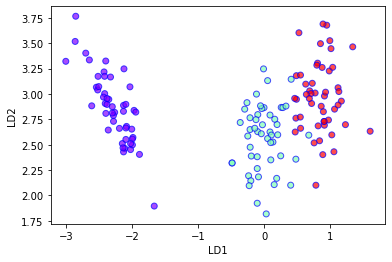

In [35]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
le = LabelEncoder()
y = le.fit_transform(irisDataFrame['class'])
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_lda[:,0], X_lda[:,1], c = y, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')